In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Задача Коши

$
\left\{
\begin{array}{ll}
    x_1' = f_1(t, x_1, x_2)\\
    x_2' = f_2(t, x_1, x_2)\\
    x_1(0) = x_{10}\\
    x_2(0) = x_{20}\\
\end{array}
\right.
$

###  Метод Рунге — Кутты четвёртого порядка

Приближенное значение в последующих точках вычисляется по итерационной формуле:

$i \in \{1, 2\}$

$
x_{i, n+1} = x_{i, n} + \frac{H}{6} (k_{1, i} + 2 k_{2, i} + 2 k_{3, i} + k_{4, i})
$,

где $k_{i}$ вычисляются по формулам:

$
k_{1, i} = f_i(t_n, x_{1, n}, x_{2, n})\\
k_{2, i} = f_i(t_n + \frac{H}{2}, x_{1, n} + \frac{H}{2} k_{1, 1}, x_{2, n} + \frac{H}{2} k_{1, 2})\\
k_{3, i} = f_i(t_n + \frac{H}{2}, x_{1, n} + \frac{H}{2} k_{2, 1}, x_{2, n} + \frac{H}{2} k_{2, 2})\\
k_{4, i} = f_i(t_n + H, x_{1, n} + H k_{3, 1}, x_{2, n} + H k_{3, 2})\\
$

$H = \frac{T}{h}$ - величина шага сетки по $t$

$h$ - количество разбиений

$t_j = \frac{T}{h} j$ - сетка, где $j=\{0, ..., h\}$

In [2]:
def cauchy(f1, f2, x10, x20, T, h):
    x1 = [x10]
    x2 = [x20]

    for i in range(h):
        k11 = f1(i*T/h, x1[-1], x2[-1])
        k12 = f2(i*T/h, x1[-1], x2[-1])
        k21 = f1(i*T/h + T/h/2, x1[-1] + T/h/2*k11, x2[-1] + T/h/2*k12)
        k22 = f2(i*T/h + T/h/2, x1[-1] + T/h/2*k11, x2[-1] + T/h/2*k12)
        k31 = f1(i*T/h + T/h/2, x1[-1] + T/h/2*k21, x2[-1] + T/h/2*k22)
        k32 = f2(i*T/h + T/h/2, x1[-1] + T/h/2*k21, x2[-1] + T/h/2*k22)
        k41 = f1(i*T/h + T/h, x1[-1] + T/h*k31, x2[-1] + T/h*k32)
        k42 = f2(i*T/h + T/h, x1[-1] + T/h*k31, x2[-1] + T/h*k32)
        
        x1.append(x1[-1] + T/h/6*(k11 + 2*k21 + 2*k31 + k41))
        x2.append(x2[-1] + T/h/6*(k12 + 2*k22 + 2*k32 + k42))
    
    return x1, x2

#### Пример

$
\left\{
\begin{array}{ll}
    x_1' = x_2\\
    x_2' = -x_1\\
    x_1(0) = 1\\
    x_2(0) = 1\\
\end{array}
\right.
$

Так как обе компоненты правой части непрерывны и их частные производные по $x_1$ и $x_2$ непрерывны, то вне зависимости от начальной точки по теореме о существовании и единственности задачи Коши существует окресность начальной точки, что задача Коши имеет единственное решение.

Решение:

$
\left\{
\begin{array}{ll}
    x_1 = cos(t) + sin(t)\\
    x_2 = cos(t) - sin(t)\\
\end{array}
\right.
$


In [3]:
def f1(t, x1, x2):
    return x2

def f2(t, x1, x2):
    return -x1

def true_x1(t):
    return np.cos(t) + np.sin(t)

def true_x2(t):
    return np.cos(t) - np.sin(t)

Векторное поле правой части

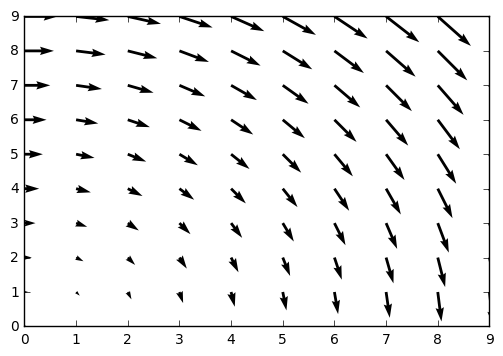

In [4]:
X, Y = np.mgrid[0:10, 0:10]
U = f1(0, X, Y)
V = f2(0, X, Y)
plt.quiver(X, Y, U, V)

Численная и аналитическая траектории

In [5]:
x10 = 1
x20 = 1
T = 1
h = 10

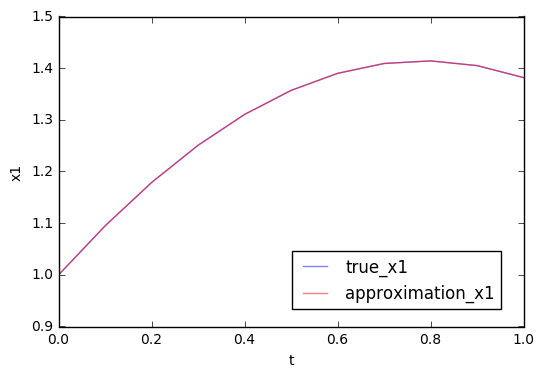

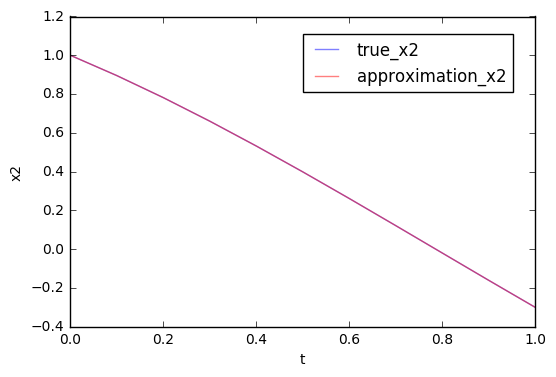

In [6]:
x1, x2 = cauchy(f1, f2, x10, x20, T, h)
t = np.linspace(0, T, h + 1)

plt.xlabel('t')
plt.ylabel('x1')
plt.plot(t, true_x1(t), "blue", label="true_x1", alpha=0.5)
plt.plot(t, x1, "red", label="approximation_x1", alpha=0.5)
plt.legend(bbox_to_anchor=(0.97, 0.27))
plt.show()

plt.xlabel('t')
plt.ylabel('x2')
plt.plot(t, true_x2(t), "blue", label="true_x2", alpha=0.5)
plt.plot(t, x2, "red", label="approximation_x2", alpha=0.5)
plt.legend(bbox_to_anchor=(0.97, 0.97))
plt.show()

Погрешность решения по сравнению с точным при уменьшающемся шаге сетки по равномерной (Чебышёвской) нормe

In [7]:
step = []
x1_error = []
x2_error = []
for segm in reversed(range(10, 1000)):
    x1, x2 = cauchy(f1, f2, x10, x20, T, segm)
    t = np.linspace(0, T, segm + 1)
    step.append(np.log(1/segm))
    x1_error.append(np.log(np.linalg.norm(x1 - true_x1(t), np.inf)))
    x2_error.append(np.log(np.linalg.norm(x2 - true_x2(t), np.inf)))

Графики погрешностей

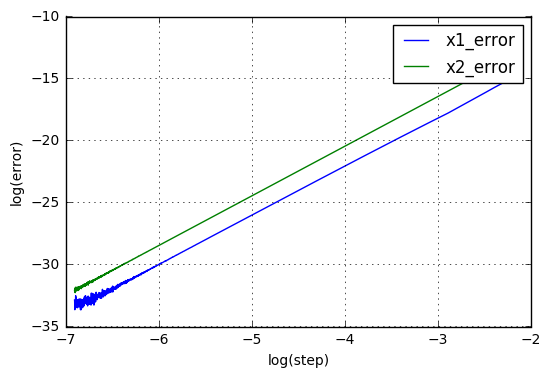

In [8]:
plt.plot(step, x1_error, label="x1_error")
plt.plot(step, x2_error, label="x2_error")
plt.xlabel("log(step)")
plt.ylabel("log(error)")
plt.legend()
plt.grid()

In [9]:
np.polyfit(step, x1_error, 1)

array([ 3.9226656 , -6.42152226])

То есть ошибка $E=-6.42*step^4$

In [10]:
np.polyfit(step, x2_error, 1)

array([ 4.00207584, -4.45190498])

То есть ошибка $E=-4.45*step^4$